# EDA

### import 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# notebook 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ybigta/FE/titanic.csv')

#### 변수
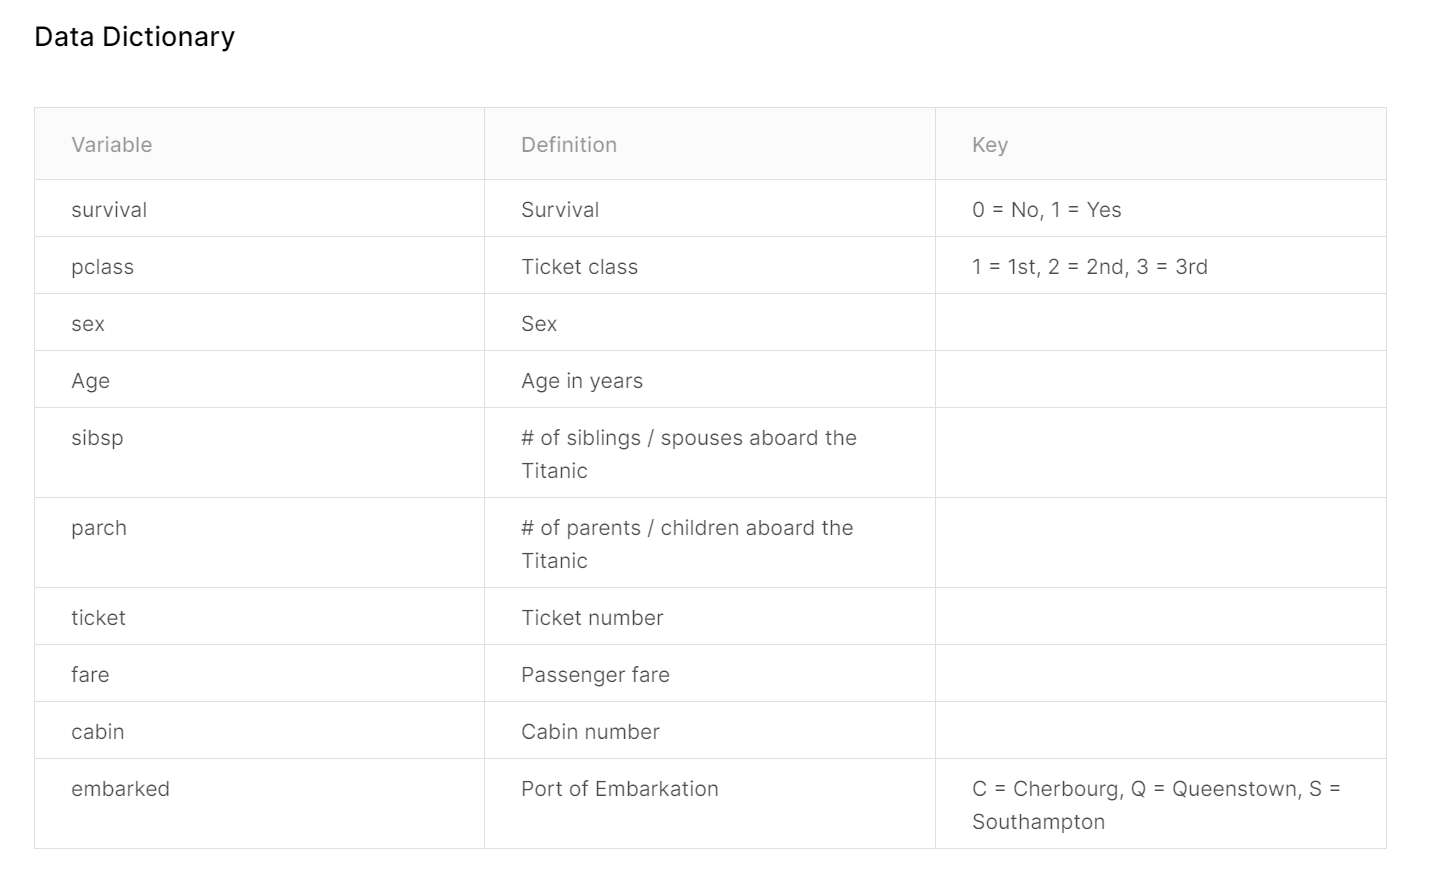

### 1. 데이터 형태 파악

In [ ]:
#한 코드 내에서 여러 DataFrame을 보고 싶으면 display

display(df.head())
display(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# head와 tail 한 번에 보기
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. 각 변수의 타입 파악
* int64: 정수형 데이터
* float64: 실수형 데이터
* object: 문자열 데이터

In [ ]:
#pd.DataFrame.info() : 데이터 수, 각 column의 이름과 정상데이터 수, 데이터 타입 등 표시
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 컬럼별 데이터 타입
print(df["PassengerId"].dtype)
print(df["Age"].dtype)
print(df["Name"].dtype)

int64
float64
object


In [ ]:
# 행과 열의 개수
df.shape

(891, 12)

In [ ]:
# unique 활용
print("---Passenger Id---\n",df["PassengerId"].unique()[:10])
print("\n---Age---\n",df["Age"].unique()[:10])
print("\n---Name---\n",df["Name"].unique()[:10])


---Passenger Id---
 [ 1  2  3  4  5  6  7  8  9 10]

---Age---
 [22. 38. 26. 35. nan 54.  2. 27. 14.  4.]

---Name---
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']


### 3. 결측치 확인하기

In [ ]:
#결측치의 수
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#결측치 비율
df.isnull().sum() / len(df) *100
#(df.isnull().sum() / len(df) *100).round(2)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
import missingno as msno

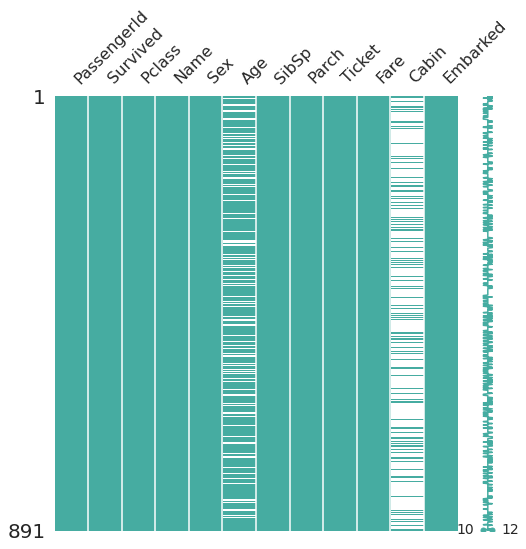

In [ ]:
msno.matrix(df=df, figsize=(8, 8), color=(70/255, 172/255, 161/255))

### 4. 이상치 확인하기

In [ ]:
#기초 데이터 요약
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

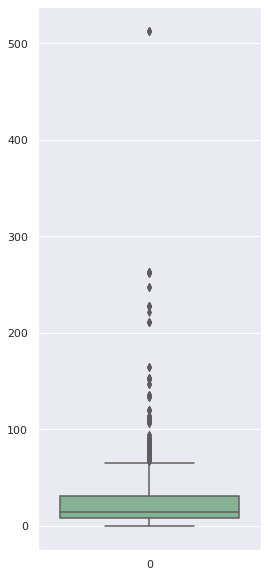

In [ ]:
sns.set() #plt를 sns 설정으로 유지
plt.figure(figsize=(4,10)) #피겨 사이즈 설정
sns.set_palette("crest") #팔레트 설정
sns.boxplot(data=df["Fare"]) #상자그림 이용

In [ ]:
df[df["Fare"] > 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


### 5. 종속변수 확인하기
- kaggle에서는 타이타닉 데이터로 survived를 예측하는 문제를 냄
- 즉 survived 값이 종속변수, 다른 값들이 독립변수

In [ ]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


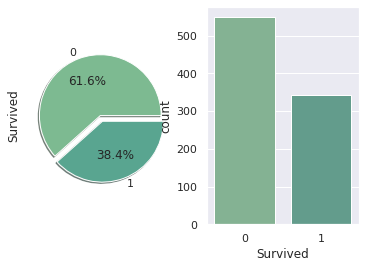

In [ ]:
f, ax = plt.subplots(1,2) #subplots: 여러 그래프를 한번에 볼때
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
sns.countplot("Survived", data = df, ax = ax[1])

### 6. 각 변수의 분포 살펴보기

* Pclass : 자리 등급을 나타내는 데이터 (1,2,3등급)  

In [ ]:
display(df["Pclass"].value_counts())
display(df[["Pclass", "Survived"]].groupby(["Pclass"]).sum())

3    491
1    216
2    184
Name: Pclass, dtype: int64

,Survived
Pclass,
1,136
2,87
3,119


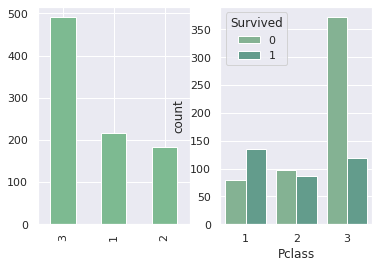

In [ ]:
# 숫자로도 파악할 수 있지만, 그래프로 보면 더 직관적
f,ax = plt.subplots(1,2)
df["Pclass"].value_counts().plot(kind = "bar", ax = ax[0]) #bar plot
sns.countplot(x = "Pclass", hue = "Survived", data = df, ax = ax[1]) #count plot 

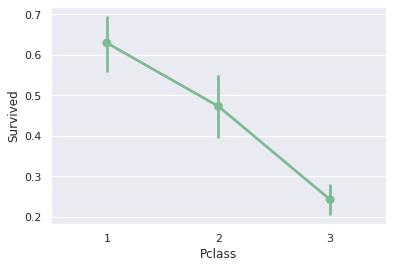

In [ ]:
sns.pointplot(x = "Pclass", y = "Survived", data = df) #point plot

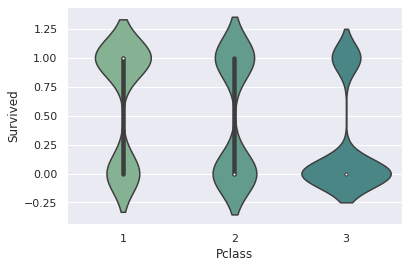

In [ ]:
sns.violinplot(x = "Pclass", y = "Survived", data = df) #violin plot

* Sex

In [ ]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


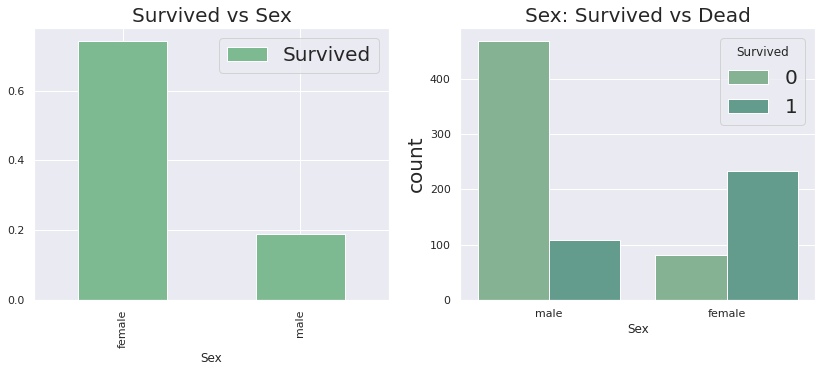

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.rc("axes", titlesize = 20) #rc: runtime configuration
plt.rc("legend", fontsize = 20)
plt.rc("ytick", labelsize = 20)
plt.ylabel('y',size=20)
df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1]) #hue: 나누어서 보고싶은 구분변수기준
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

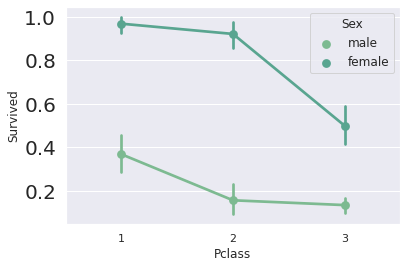

In [ ]:
plt.rc("legend", fontsize = 12)
sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = df)

* Age

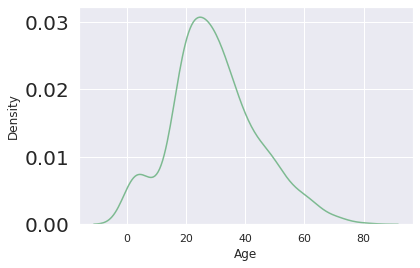

In [ ]:
sns.kdeplot(df['Age']) #확률밀도함수
plt.show()

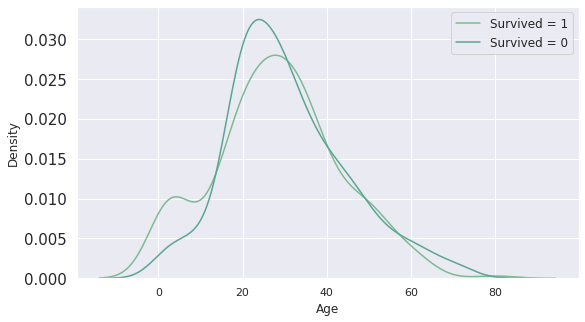

In [ ]:
plt.rc("ytick", labelsize = 15)
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax) #plt는 여러개를 이어서 쓰면 플롯이 쌓여요!
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

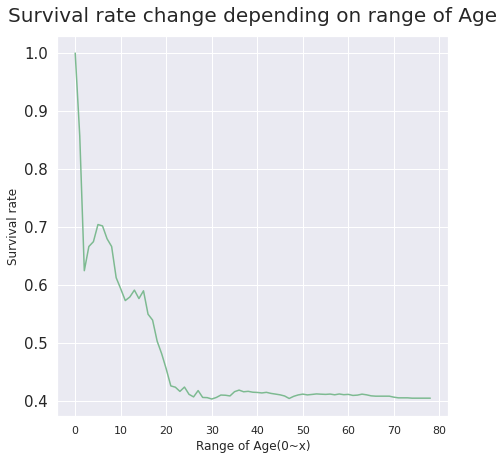

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df[df['Age'] < i]['Survived'].sum() / len(df[df['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

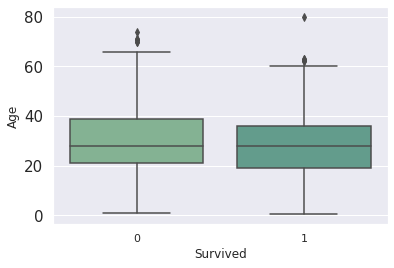

In [ ]:
sns.boxplot( x = "Survived", y = "Age", data = df)

* Embarked

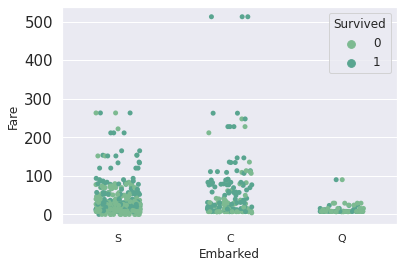

In [ ]:
sns.stripplot( x = "Embarked", y = "Fare", hue = "Survived", data = df, jitter = 0.2)

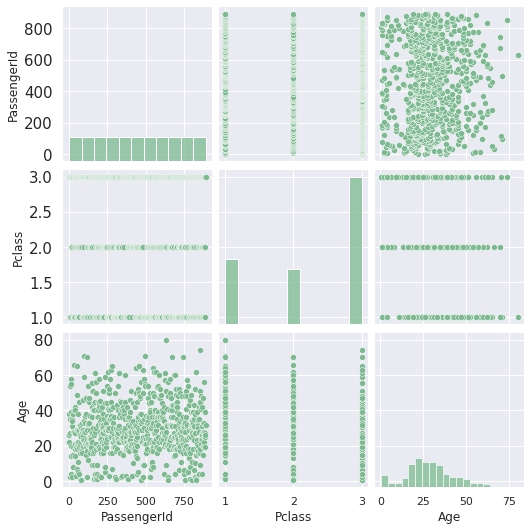

In [ ]:
# 대각성분은 histogram, 나머지는 scatterplot
sns.pairplot(df, vars = ["PassengerId","Pclass","Age"])

(10.5, -0.5)

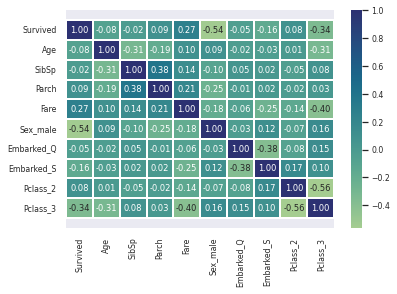

In [ ]:
df_ml = df.copy()

df_ml = pd.get_dummies(df_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
# 필요없는 column과 na값 drop
df_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)
df_ml.dropna(inplace=True)

sns.set(font_scale = 0.7)
ax = sns.heatmap(df_ml.corr(), annot = True, fmt = ".2f", linewidths = 1, cmap="crest")
buttom, top = ax.get_ylim()
ax.set_ylim(buttom + 0.5, top - 0.5)

# FE
- Train, Test 동일 적용해야 함

#### **<자료의 형태>**
- **Numerical (수치형)** : 관측된 값이 수치로 측정되는 자료
  - Continuous (연속형). ex) 키, 몸무게
  - Discrete (이산형). ex) 주사위 결과, 교통사고 건수

- **Categorical (범주형)** : 관측 결과가 몇 개의 범주 또는 항목의 형태로 나타나는 자료
  - Ordinal (순위형) : 범주 간에 순서가 의미 있는 자료. ex) 평점, 선호도(좋다/보통이다/싫다)
  - Nominal (명목형) : 범주 간에 순서가 의미 없는 자료. ex) 성별, 혈액형, 지역 

- 범주형 자료를 수치형 자료처럼 표현할 수 있으므로 잘 구분해야 함

## 1. Imputing
- WHY ? 모델한테 Null 값 넣으면 X
- Imputing: NaN(결측값)을 추정값으로 대체하는 것

- 70% 이상이면, Drop해서 제거
- 5% 이상이면, Feature로 따로 추가 + Null 값 채우기


▪ Numerical : 0 or median

▪ Categorical : mode, 없다면 'Null'

▪ Random Sampling : 임의로 뽑은 값

In [ ]:
#결측치 비율
df.isnull().sum() / len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- Null 값 비중이 70% 이상인 feature 'Cabin' 삭제
- 10% 이상인 feature 'Age'는 따로 feature로 추가 + Null 값 채우기
- 'Embarked' 도 Null 값 채우기

In [ ]:
# Cabin 삭제
df.drop(columns='Cabin', inplace=True)
df.isnull().sum() / len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [ ]:
# Age (1) : Initial feature 따로 추가해 관리

print(df['Age'].isnull().sum())
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.') # Extract the Salutations
pd.crosstab(df['Initial'], df['Sex']).T.style.background_gradient(cmap='summer_r') # Check Initials with Sex

177


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


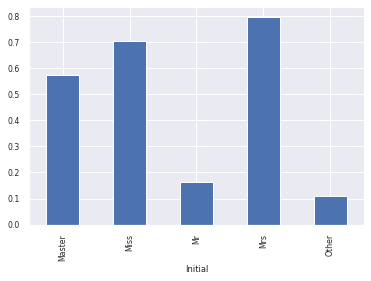

In [ ]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

display(df.groupby('Initial').mean())
display(df.groupby('Initial')['Survived'].mean().plot.bar())

In [ ]:
# Age (2) : Null 값 채우기 
# Numerical data -> 0 or Median or Mean 으로 채우기

df['Age'].dtypes
df.groupby('Initial').median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,345,1,3,3.5,1,1,29.06250
Miss,385,1,3,21.5,0,0,16.22085
Mr,467,0,3,30.0,0,0,9.50000
Mrs,441,1,2,35.0,1,0,26.00000
Other,648,0,2,51.0,0,0,13.00000


In [ ]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age'] = 30
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age'] = 35
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age'] = 4
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age'] = 22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age'] = 51

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Embarked    2
dtype: int64

In [ ]:
# Embarked : Null 값 채우기
# Object data (Categorical) -> mode, 없다면 'Null'
# Null 값이 2개이며, S에서 가장 많은 탑승객이 있었으므로, Null을 S로 채웠음

df['Embarked'].dtypes
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## 2. Encoding
- WHY ? 모델한테 Categorical 넣으면 X

▪ Categorical 하면 One-hot Encoding (0,1)

▪ 순서가 있다면, Label Encoding 가능 (0,1,2,...)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Initial         object
dtype: object

In [ ]:
# Categorical (object data type) 없애기 위한 Encoding 방법 정하고자 확인
df[['Sex', 'Embarked', 'Ticket', 'Initial']]

,Sex,Embarked,Ticket,Initial
0,male,S,A/5 21171,Mr
1,female,C,PC 17599,Mrs
2,female,S,STON/O2. 3101282,Miss
3,female,S,113803,Mrs
4,male,S,373450,Mr
...,...,...,...,...
886,male,S,211536,Other
887,female,S,112053,Miss
888,female,S,W./C. 6607,Miss
889,male,C,111369,Mr


In [ ]:
print(df['Sex'].unique())
print(df['Embarked'].unique())
print(df['Initial'].unique())

['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


Categorical (object data type) 없애기 위해 
- 종류가 너무 많은 'Ticket' 나타내지 X
- 순서가 없는 'Sex'와 'Embarked'는 원핫 인코딩
- 순서가 있는 'Initial'은 레이블 인코딩 

In [ ]:
Sex_type = ['female','male']
for t in Sex_type:
    df['Sex'+'_'+t] = np.where(df['Sex'] == t,1,0)
df['Sex_female']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_female, Length: 891, dtype: int64

In [ ]:
Em_type = ['S','C ','Q']
for t in Em_type:
    df['Embarked'+'_'+t] = np.where(df['Embarked'] == t,1,0)
df['Embarked_S']

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: Embarked_S, Length: 891, dtype: int64

In [ ]:
df['Initial'] = df['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Embarked_S,Embarked_C,Embarked_Q,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,4,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S,1,1,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,2,0,0,0,0,1


## 3. Outlier removing
- WHY ? 모델의 오버피팅 방지

▪ Boxplot 그리고 IQR 밖의 인스턴스 제거

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


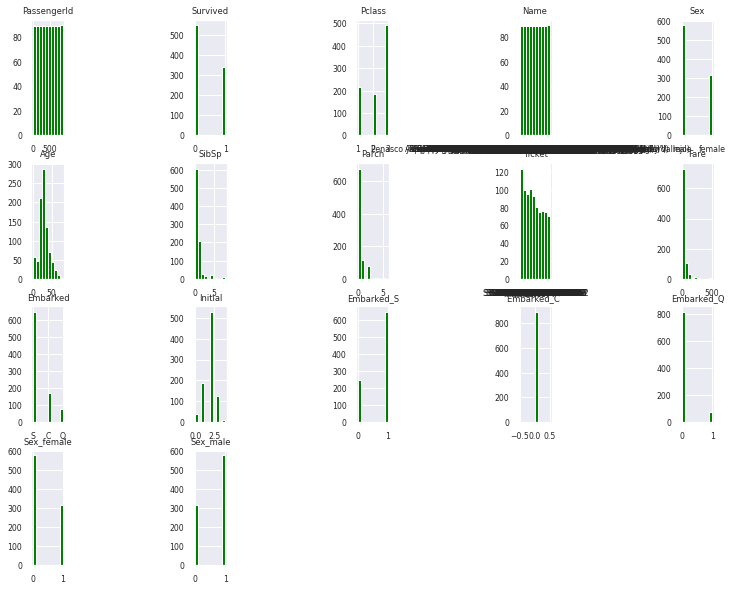

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns.to_list()):
    plt.subplot(5, 5, i + 1)
    plt.hist(df[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

## 4. Correlation removing

- WHY ? 모델의 오버피팅 방지

- 0.9 넘으면, Feature 제거 추천

- 회귀의 경우 필수 (다중공선성은 회귀의 가정 위반)

>다중공선성(Multicollinearity) : 독립변수들 간에 강한 상관관계를 보이는 것 

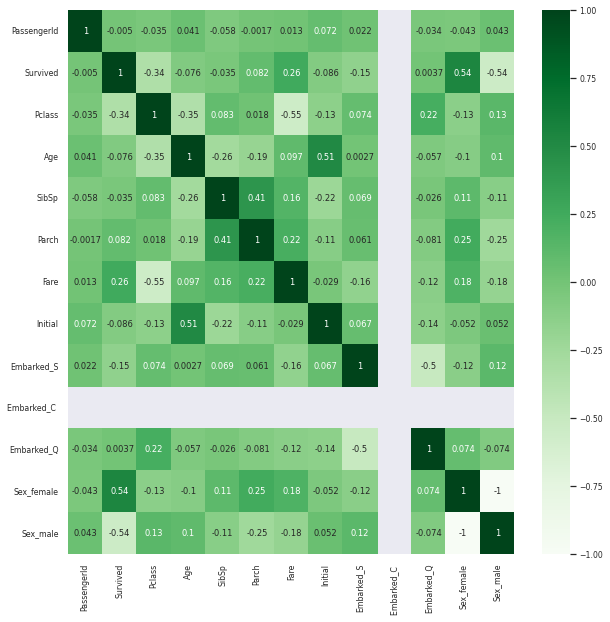

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

지나치게 상관관계 높은 값 없음!

마지막으로, 불필요한 column 삭제

In [ ]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,Embarked_S,Embarked_C,Embarked_Q,Sex_female,Sex_male
0,0,3,male,22.0,7.2500,S,2,1,0,0,0,1
1,1,1,female,38.0,71.2833,C,3,0,0,0,1,0
2,1,3,female,26.0,7.9250,S,1,1,0,0,1,0
3,1,1,female,35.0,53.1000,S,3,1,0,0,1,0
4,0,3,male,35.0,8.0500,S,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,4,1,0,0,0,1
887,1,1,female,19.0,30.0000,S,1,1,0,0,1,0
888,0,3,female,22.0,23.4500,S,1,1,0,0,1,0
889,1,1,male,26.0,30.0000,C,2,0,0,0,0,1
